### Data manipulation (cleaning, preparing) using Pandas
<br>Given - csv file "rotten_tomatoes_movies.csv" 
<br>Goal - explore what features predict if a movie is considered bad (‘Rotten’) 
<br>or good (‘Fresh’ or ‘Certified Fresh’)
<br>by critics (tomatometer_status column in the dataset)
<br>
<br>It is basically a classification problem.
<br>Ideally you can:
 - combine ‘Fresh’ & ‘Certified Fresh’ as 1, everything else as 0
 - remove irrelevant columns
 - convert types to numeric 
 - deal with nulls - dropna()
 - deal with outliers - quantile(0.95)
 - scale (sklearn.preprocessing.StandardScaler or manually)
 - look at correlation
 - run the model (Logistic Regression, RandomForest, etc.)
 - Review the output, confusion matrix, ROC curve, ...
 - Review the top predictors
<br>
<br>This specific example is well known and reviewed in multiple places.
<br>You can just google for the file name "rotten_tomatoes_movies.csv"
<br>to see what different people do with it.
<br>For example:
<br> - [https://www.kaggle.com/kerneler/starter-rotten-tomatoes-movies-and-75caf071-3](https://www.kaggle.com/kerneler/starter-rotten-tomatoes-movies-and-75caf071-3)

In [1]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
!python --version

Python 3.9.12


In [2]:
# import util_jupyter
# from util_jupyter import *
# util_jupyter.cell_width() # set cell with to 95% of screen

In [3]:
from sklearn.model_selection import train_test_split
from sklearn                 import metrics
from sklearn.linear_model    import LogisticRegression
from sklearn.ensemble        import RandomForestClassifier

# conda install -c conda-forge xgboost 
from xgboost.sklearn         import XGBClassifier
import xgboost

# pip install shap
import shap
# print the JS visualization code to the notebook
shap.initjs()

In [4]:
!ls -1 data/

junk.yaml
rotten_tomatoes_movies.csv


In [5]:
# read data from file - from local drive or from url
df = pd.read_csv("data/rotten_tomatoes_movies.csv")
# util_jupyter.sdf(df)
print(f"len(df) = {len(df)}")
print(list(df.columns))
df.head(3).T

len(df) = 8701
['rotten_tomatoes_link', 'movie_title', 'movie_info', 'critics_consensus', 'poster_image_url', 'rating', 'genre', 'directors', 'writers', 'cast', 'in_theaters_date', 'on_streaming_date', 'runtime_in_minutes', 'studio_name', 'tomatometer_status', 'tomatometer_rating', 'tomatometer_count', 'audience_status', 'audience_rating', 'audience_count', 'audience_top_critics_count', 'audience_fresh_critics_count', 'audience_rotten_critics_count']


,0,1,2
rotten_tomatoes_link,/m/the_freshman,/m/hit_by_lightning,/m/day_after_tomorrow
movie_title,The Freshman (College Days),Hit By Lightning,The Day After Tomorrow
movie_info,One of Harold Lloyd's best feature-length come...,RICKY MILLER a sweet 40-plus manager of a Denn...,What if we are on the brink of a new Ice Age? ...
critics_consensus,NaN,NaN,The Day After Tomorrow is a ludicrous popcorn ...
poster_image_url,https://resizing.flixster.com/UPJ5dR_5-Crx4XEQ...,https://resizing.flixster.com/B5P7YAAPZg59zPjo...,https://resizing.flixster.com/yGQTvn2L65wzv5ov...
rating,NR,NR,PG-13
genre,"Classics, Comedy","Comedy, Romance","Action & Adventure, Drama, Mystery & Suspense,..."
directors,"Fred Newmeyer, Sam Taylor",Ricky Blitt,Roland Emmerich
writers,"Ted Wilde, Tim Whelan Sr., Sam Taylor, Lex Nea...",Ricky Blitt,"Jeffrey Nachmanoff, Roland Emmerich"
cast,"Harold Lloyd, Jobyna Ralston, Brooks Benedict,...","Jon Cryer, Will Sasso, Stephanie Szostak, Alex...","Dennis Quaid, Jake Gyllenhaal, Emmy Rossum, Da..."


In [6]:
df.isnull().sum()

rotten_tomatoes_link                0
movie_title                         0
movie_info                         13
critics_consensus                4321
poster_image_url                    0
rating                              0
genre                               7
directors                          61
writers                           703
cast                              151
in_theaters_date                  427
on_streaming_date                   0
runtime_in_minutes                 73
studio_name                       210
tomatometer_status                  0
tomatometer_rating                  0
tomatometer_count                   0
audience_status                   127
audience_rating                   127
audience_count                    127
audience_top_critics_count          0
audience_fresh_critics_count        0
audience_rotten_critics_count       0
dtype: int64

In [7]:
df.head(3).T

,0,1,2
rotten_tomatoes_link,/m/the_freshman,/m/hit_by_lightning,/m/day_after_tomorrow
movie_title,The Freshman (College Days),Hit By Lightning,The Day After Tomorrow
movie_info,One of Harold Lloyd's best feature-length come...,RICKY MILLER a sweet 40-plus manager of a Denn...,What if we are on the brink of a new Ice Age? ...
critics_consensus,NaN,NaN,The Day After Tomorrow is a ludicrous popcorn ...
poster_image_url,https://resizing.flixster.com/UPJ5dR_5-Crx4XEQ...,https://resizing.flixster.com/B5P7YAAPZg59zPjo...,https://resizing.flixster.com/yGQTvn2L65wzv5ov...
rating,NR,NR,PG-13
genre,"Classics, Comedy","Comedy, Romance","Action & Adventure, Drama, Mystery & Suspense,..."
directors,"Fred Newmeyer, Sam Taylor",Ricky Blitt,Roland Emmerich
writers,"Ted Wilde, Tim Whelan Sr., Sam Taylor, Lex Nea...",Ricky Blitt,"Jeffrey Nachmanoff, Roland Emmerich"
cast,"Harold Lloyd, Jobyna Ralston, Brooks Benedict,...","Jon Cryer, Will Sasso, Stephanie Szostak, Alex...","Dennis Quaid, Jake Gyllenhaal, Emmy Rossum, Da..."


In [8]:
# let's select numerical and categorical columns only
mycols = [
'rating', 'runtime_in_minutes', 'tomatometer_status', 
'tomatometer_rating', 'audience_status', 'audience_rating', 
'audience_count', 'audience_top_critics_count',
'audience_fresh_critics_count', 'audience_rotten_critics_count']
df2 = df[mycols].copy()

In [9]:
# check for nulls
df2.isnull().sum()

rating                             0
runtime_in_minutes                73
tomatometer_status                 0
tomatometer_rating                 0
audience_status                  127
audience_rating                  127
audience_count                   127
audience_top_critics_count         0
audience_fresh_critics_count       0
audience_rotten_critics_count      0
dtype: int64

In [10]:
print("removing rows with nulls")
print(f"rows before : {len(df2)}")
df2.dropna(inplace=True)
print(f"rows after  : {len(df2)}")
print(df2.isnull().sum())

removing rows with nulls
rows before : 8701
rows after  : 8504
rating                           0
runtime_in_minutes               0
tomatometer_status               0
tomatometer_rating               0
audience_status                  0
audience_rating                  0
audience_count                   0
audience_top_critics_count       0
audience_fresh_critics_count     0
audience_rotten_critics_count    0
dtype: int64


In [11]:
df2.head().T

,0,1,2,3,4
rating,NR,NR,PG-13,R,R
runtime_in_minutes,70.0,90.0,124.0,97.0,99.0
tomatometer_status,Fresh,Rotten,Rotten,Rotten,Rotten
tomatometer_rating,93,11,44,58,28
audience_status,Upright,Spilled,Spilled,Spilled,Upright
audience_rating,79.0,19.0,50.0,56.0,64.0
audience_count,310.0,196.0,32749429.0,1767.0,102991.0
audience_top_critics_count,5,5,46,10,12
audience_fresh_critics_count,14,1,97,18,11
audience_rotten_critics_count,1,8,122,13,28


In [12]:
df2.dtypes

rating                            object
runtime_in_minutes               float64
tomatometer_status                object
tomatometer_rating                 int64
audience_status                   object
audience_rating                  float64
audience_count                   float64
audience_top_critics_count         int64
audience_fresh_critics_count       int64
audience_rotten_critics_count      int64
dtype: object

In [13]:
df2.tomatometer_status.value_counts()

Rotten             3697
Fresh              3271
Certified Fresh    1536
Name: tomatometer_status, dtype: int64

In [14]:
# combine 'Fresh','Certified Fresh' into one class "1", the rest into "0"
mask = df2.tomatometer_status.isin(['Fresh','Certified Fresh'])
df2.loc[mask,'tomatometer_status'] = 1
df2.loc[~mask,'tomatometer_status'] = 0
df2['tomatometer_status'] = df2['tomatometer_status'].astype(np.int64)
df2.tomatometer_status.value_counts()

1    4807
0    3697
Name: tomatometer_status, dtype: int64

In [15]:
df2.dtypes

rating                            object
runtime_in_minutes               float64
tomatometer_status                 int64
tomatometer_rating                 int64
audience_status                   object
audience_rating                  float64
audience_count                   float64
audience_top_critics_count         int64
audience_fresh_critics_count       int64
audience_rotten_critics_count      int64
dtype: object

In [16]:
df2.rating.value_counts()

R         3203
NR        2429
PG-13     1480
PG        1053
G          325
NC17        12
PG-13)       1
R)           1
Name: rating, dtype: int64

In [17]:
df2.audience_status.value_counts()

Upright    4690
Spilled    3814
Name: audience_status, dtype: int64

In [18]:
# do one-hot encoding
df3 = pd.get_dummies(df2, columns=['rating','audience_status'], drop_first=True)

In [19]:
df3.dtypes

runtime_in_minutes               float64
tomatometer_status                 int64
tomatometer_rating                 int64
audience_rating                  float64
audience_count                   float64
audience_top_critics_count         int64
audience_fresh_critics_count       int64
audience_rotten_critics_count      int64
rating_NC17                        uint8
rating_NR                          uint8
rating_PG                          uint8
rating_PG-13                       uint8
rating_PG-13)                      uint8
rating_R                           uint8
rating_R)                          uint8
audience_status_Upright            uint8
dtype: object

In [20]:
df3.head()

,runtime_in_minutes,tomatometer_status,tomatometer_rating,audience_rating,audience_count,audience_top_critics_count,audience_fresh_critics_count,audience_rotten_critics_count,rating_NC17,rating_NR,rating_PG,rating_PG-13,rating_PG-13),rating_R,rating_R),audience_status_Upright
0,70.0,1,93,79.0,310.0,5,14,1,0,1,0,0,0,0,0,1
1,90.0,0,11,19.0,196.0,5,1,8,0,1,0,0,0,0,0,0
2,124.0,0,44,50.0,32749429.0,46,97,122,0,0,0,1,0,0,0,0
3,97.0,0,58,56.0,1767.0,10,18,13,0,0,0,0,0,1,0,0
4,99.0,0,28,64.0,102991.0,12,11,28,0,0,0,0,0,1,0,1


In [21]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
runtime_in_minutes,8504.0,102.588899,2.846832e+01,1.0,90.0,99.0,111.0,2000.0
tomatometer_status,8504.0,0.565263,4.957515e-01,0.0,0.0,1.0,1.0,1.0
tomatometer_rating,8504.0,60.496237,2.847252e+01,0.0,38.0,66.0,86.0,100.0
audience_rating,8504.0,60.730127,2.036150e+01,0.0,45.0,63.0,78.0,100.0
audience_count,8504.0,144136.367592,1.742030e+06,5.0,896.5,4989.5,29914.0,35797635.0
audience_top_critics_count,8504.0,14.785278,1.486978e+01,0.0,3.0,9.0,24.0,64.0
audience_fresh_critics_count,8504.0,36.184854,5.136701e+01,0.0,6.0,17.0,44.0,470.0
audience_rotten_critics_count,8504.0,21.021049,2.992578e+01,0.0,3.0,8.0,25.0,250.0
rating_NC17,8504.0,0.001411,3.754031e-02,0.0,0.0,0.0,0.0,1.0
rating_NR,8504.0,0.285630,4.517407e-01,0.0,0.0,0.0,1.0,1.0


In [22]:
# It looks like two columns have big outliers - max values
# Look at the difference between 95% quantile values and max values 
def myprint(val):
    print(f"{val:15.2f}")

print('runtime_in_minutes')
myprint(df3.runtime_in_minutes.quantile(0.95))
myprint(df3.runtime_in_minutes.max())
print('audience_count')
myprint(df3.audience_count.quantile(0.95))
myprint(df3.audience_count.max())

runtime_in_minutes
         135.00
        2000.00
audience_count
      322615.20
    35797635.00


In [23]:
# Let-s decrease outliers to (95% quantile value)

for col in ['runtime_in_minutes', 'audience_count']:
    quantile95 = df3[col].quantile(0.95)
    myval = quantile95
    mask = df3[col] > myval
    df3.loc[mask,col] = myval

df3.describe().T

,count,mean,std,min,25%,50%,75%,max
runtime_in_minutes,8504.0,101.348307,16.244183,1.0,90.0,99.0,111.0,135.0
tomatometer_status,8504.0,0.565263,0.495752,0.0,0.0,1.0,1.0,1.0
tomatometer_rating,8504.0,60.496237,28.472521,0.0,38.0,66.0,86.0,100.0
audience_rating,8504.0,60.730127,20.361503,0.0,45.0,63.0,78.0,100.0
audience_count,8504.0,40190.571872,82776.187127,5.0,896.5,4989.5,29914.0,322615.2
audience_top_critics_count,8504.0,14.785278,14.869782,0.0,3.0,9.0,24.0,64.0
audience_fresh_critics_count,8504.0,36.184854,51.367009,0.0,6.0,17.0,44.0,470.0
audience_rotten_critics_count,8504.0,21.021049,29.925780,0.0,3.0,8.0,25.0,250.0
rating_NC17,8504.0,0.001411,0.037540,0.0,0.0,0.0,0.0,1.0
rating_NR,8504.0,0.285630,0.451741,0.0,0.0,0.0,1.0,1.0


In [24]:
# lets scale to mean value for all columns
# Note - alternatively we could-ve used 
# sklearn.preprocessing.StandardScaler

all_cols = df3.columns
# cols_to_scale = [x for x in all_cols if x != 'tomatometer_status']

cols_to_scale = ['runtime_in_minutes','tomatometer_rating',
                 'audience_rating', 'audience_count',
                 'audience_top_critics_count','audience_fresh_critics_count',
                 'audience_rotten_critics_count']

for col in cols_to_scale:
    mean_val = df3[col].mean()
    df3[col] = df3[col] / mean_val

df3.describe().T

,count,mean,std,min,25%,50%,75%,max
runtime_in_minutes,8504.0,1.000000,0.160281,0.009867,0.888027,0.976829,1.095233,1.332040
tomatometer_status,8504.0,0.565263,0.495752,0.000000,0.000000,1.000000,1.000000,1.000000
tomatometer_rating,8504.0,1.000000,0.470649,0.000000,0.628138,1.090977,1.421576,1.652995
audience_rating,8504.0,1.000000,0.335278,0.000000,0.740983,1.037376,1.284371,1.646629
audience_count,8504.0,1.000000,2.059592,0.000124,0.022306,0.124146,0.744304,8.027136
audience_top_critics_count,8504.0,1.000000,1.005715,0.000000,0.202905,0.608714,1.623236,4.328630
audience_fresh_critics_count,8504.0,1.000000,1.419572,0.000000,0.165815,0.469810,1.215978,12.988860
audience_rotten_critics_count,8504.0,1.000000,1.423610,0.000000,0.142714,0.380571,1.189284,11.892841
rating_NC17,8504.0,0.001411,0.037540,0.000000,0.000000,0.000000,0.000000,1.000000
rating_NR,8504.0,0.285630,0.451741,0.000000,0.000000,0.000000,1.000000,1.000000


In [25]:
# convenience functions from 
# https://www.kaggle.com/kerneler/starter-rotten-tomatoes-movies-and-75caf071-3
# --------------------------------------------------------------
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    """ Distribution graphs (histogram/bar graph) of column data """
    nunique = df.nunique()
    # df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num = None, figsize = (4 * nGraphPerRow, 2 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [26]:
# --------------------------------------------------------------
def plotCorrelationMatrix(df, graphWidth):
    """ Correlation matrix """
    filename = df.dataframeName
    df = df.dropna(axis='columns', how='any') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [27]:
# --------------------------------------------------------------
def plotScatterMatrix(df, plotSize, textSize):
    """ Scatter and density plots """
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna(axis='columns', how='any')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [28]:
df3.dtypes

runtime_in_minutes               float64
tomatometer_status                 int64
tomatometer_rating               float64
audience_rating                  float64
audience_count                   float64
audience_top_critics_count       float64
audience_fresh_critics_count     float64
audience_rotten_critics_count    float64
rating_NC17                        uint8
rating_NR                          uint8
rating_PG                          uint8
rating_PG-13                       uint8
rating_PG-13)                      uint8
rating_R                           uint8
rating_R)                          uint8
audience_status_Upright            uint8
dtype: object

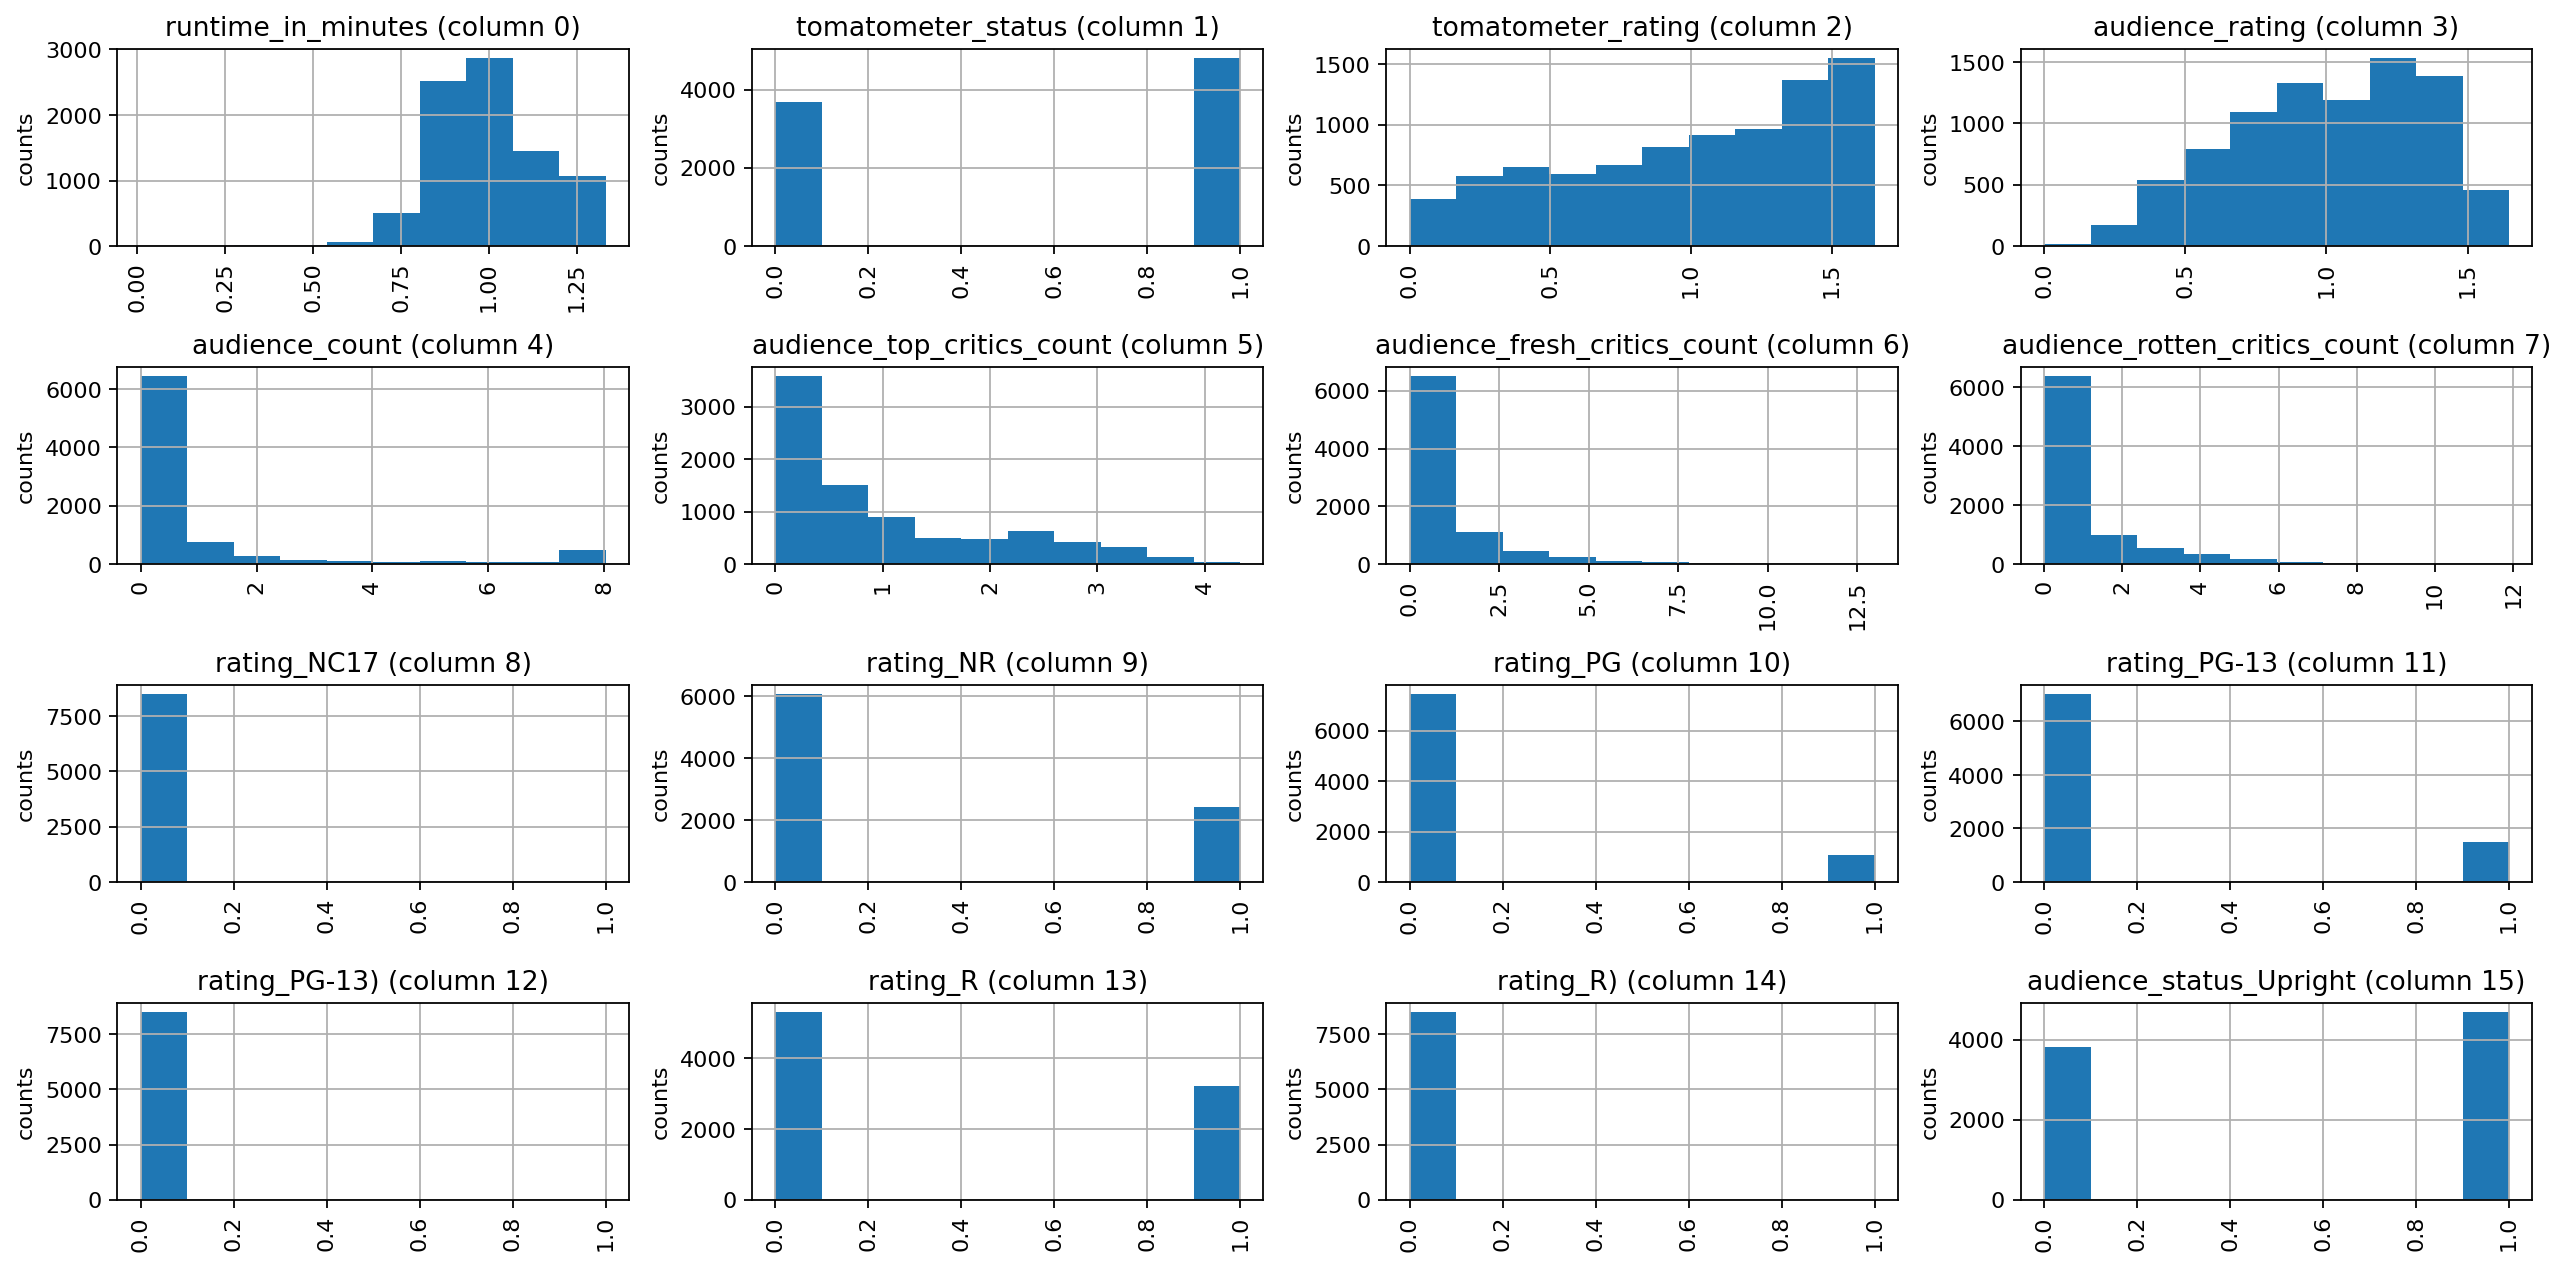

In [29]:
# we have 16 columns
# uncomment next line to see 16 graphs
plotPerColumnDistribution(df3, 20, 4)  # df, nGraphShown, nGraphPerRow

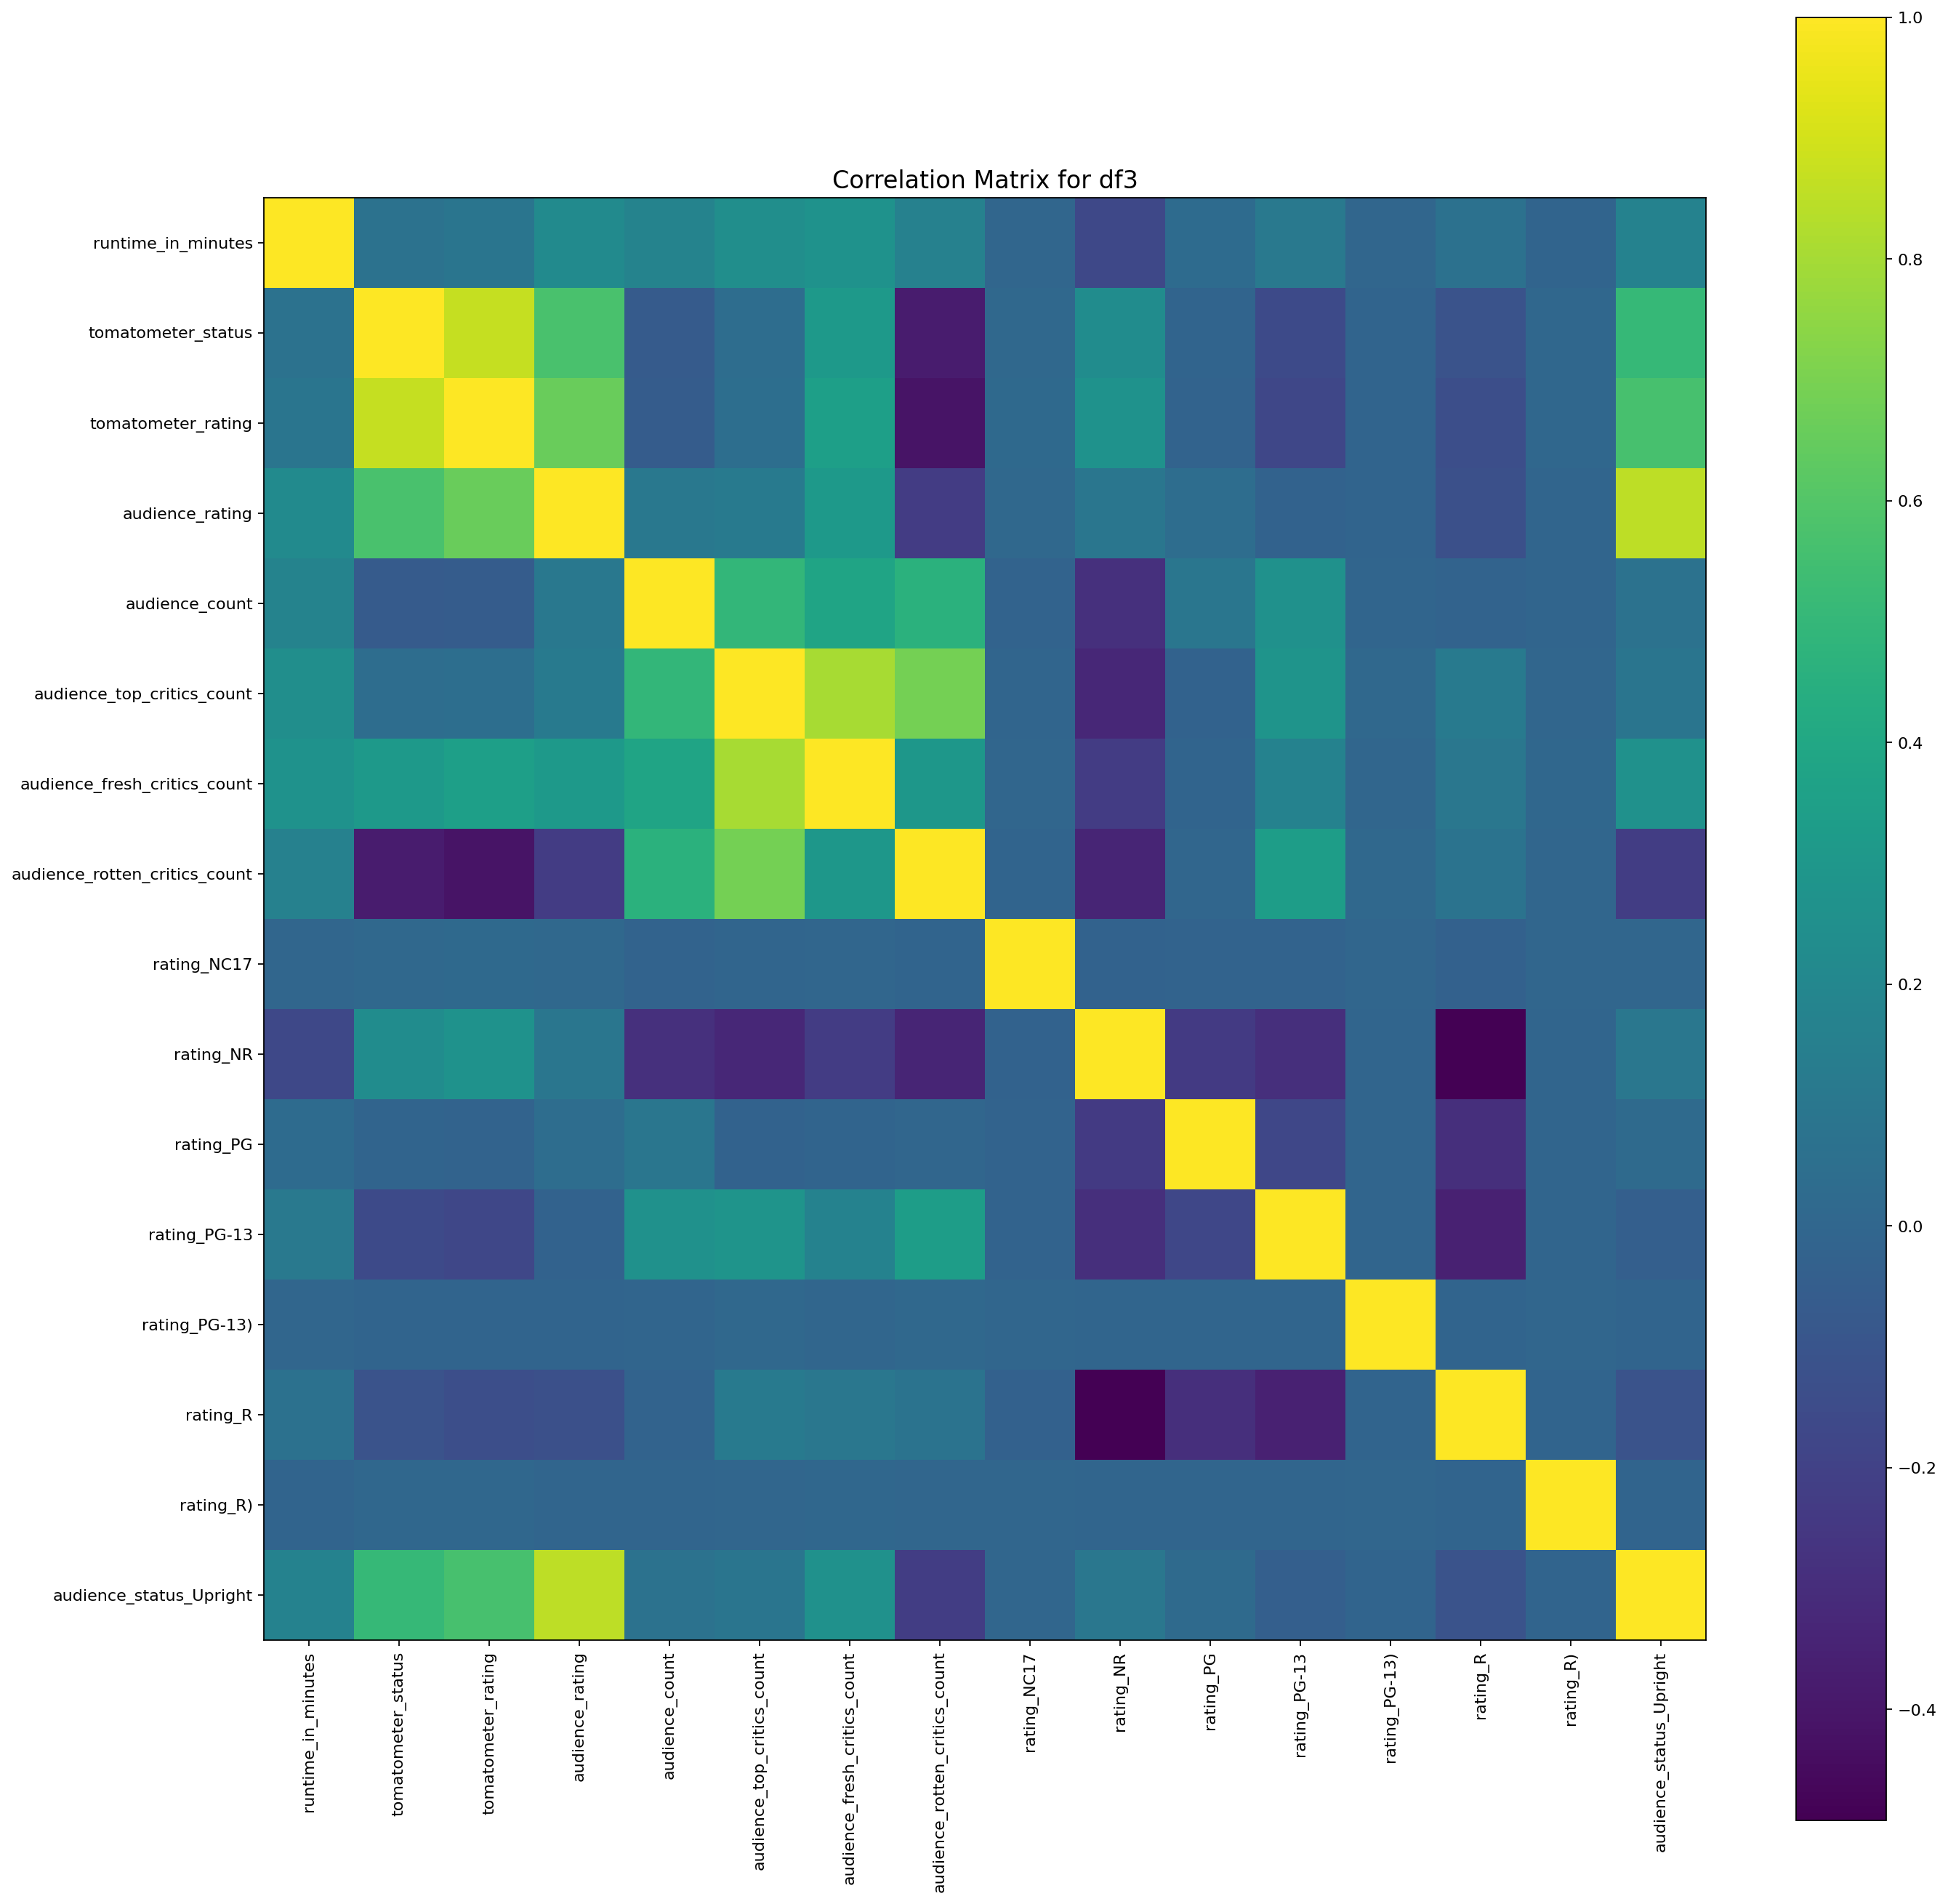

In [30]:
df3.dataframeName = 'df3'
# uncomment next line to see CorrelationMatrix
plotCorrelationMatrix(df3, 20)

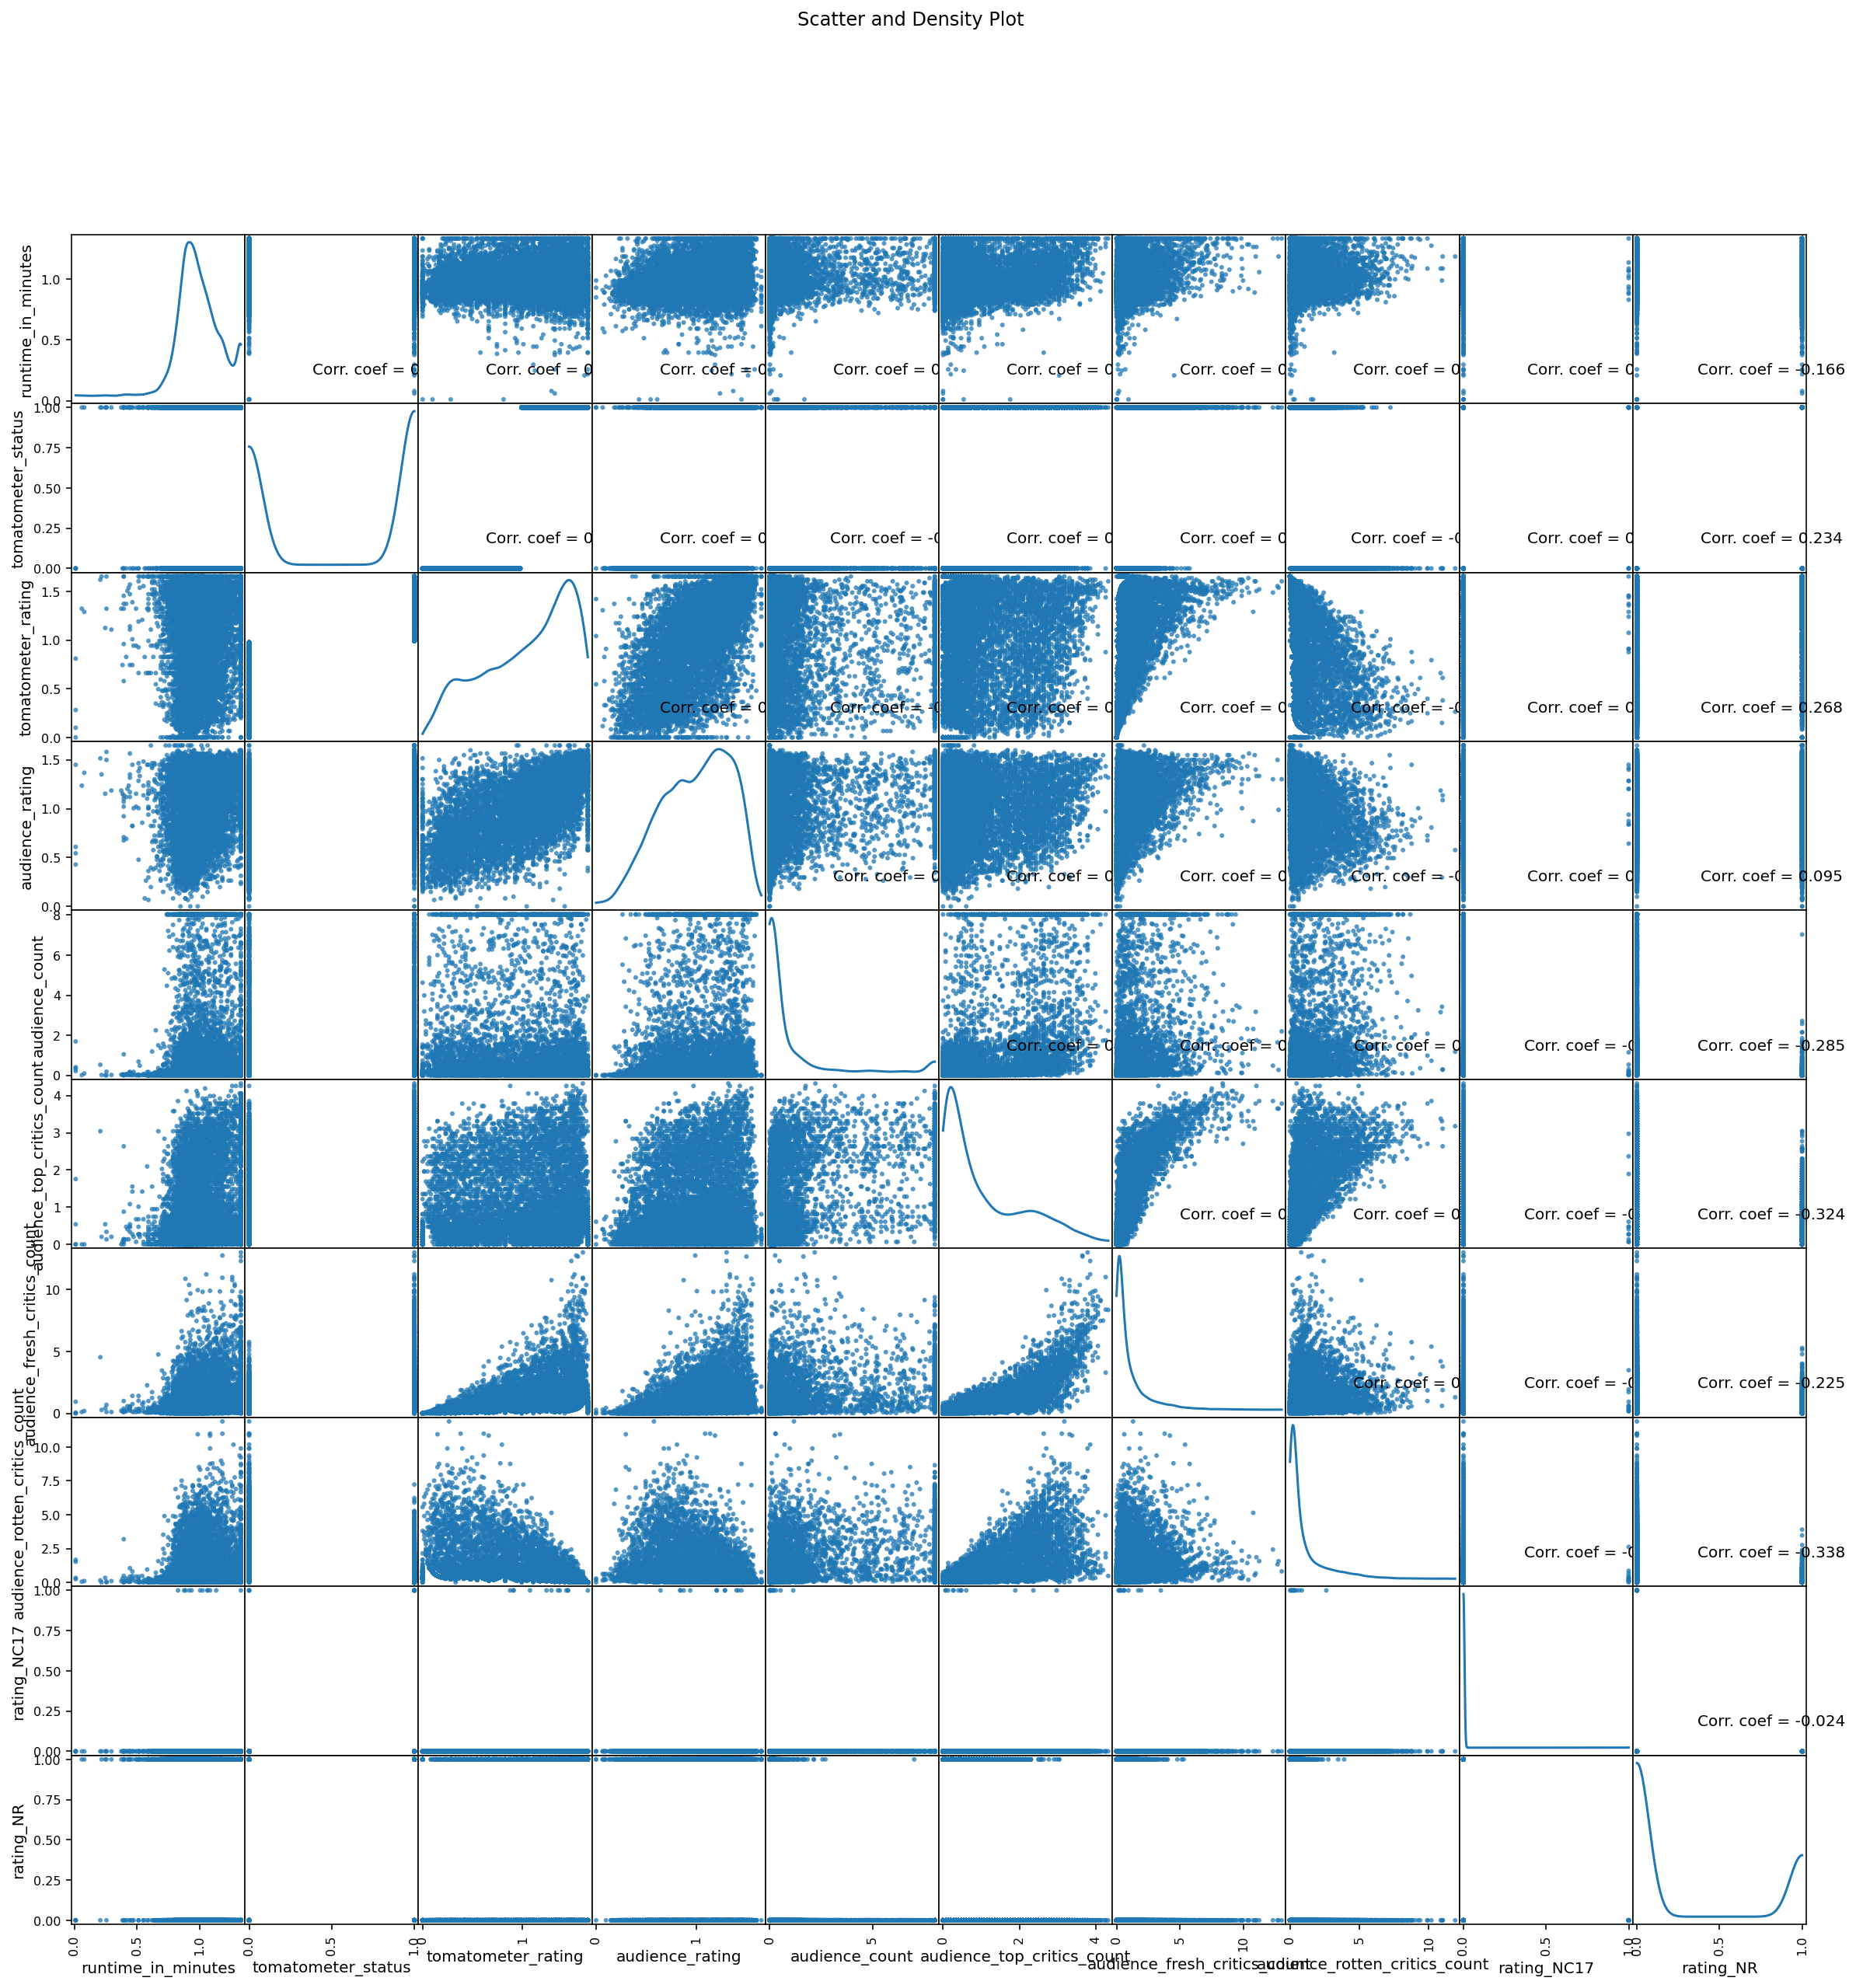

In [31]:
# uncomment next line to see ScatterMatrix
plotScatterMatrix(df3, 20, 10)

In [32]:
data = df3.copy()
del data['tomatometer_status']
for col in ['audience_count', 'audience_top_critics_count',
            'audience_fresh_critics_count','audience_rotten_critics_count']:
    if col in data.columns:
        del data[col]
myfeatures = list(data.columns)
data_values = data.values
print(data_values)

[[0.69068742 1.5372857  1.30083706 ... 0.         0.         1.        ]
 [0.88802668 0.18182949 0.31285955 ... 0.         0.         0.        ]
 [1.22350342 0.72731796 0.8233146  ... 0.         0.         0.        ]
 ...
 [0.85842579 0.99179722 0.57632022 ... 1.         0.         0.        ]
 [1.13470075 0.71078801 0.95504493 ... 0.         0.         0.        ]
 [0.94722846 0.33059907 0.55985393 ... 1.         0.         0.        ]]


In [33]:
target = df3['tomatometer_status'].values
print(target)

[1 0 0 ... 1 0 0]


In [34]:
x_train, x_test, y_train, y_test = train_test_split(data_values, target, test_size=0.25, random_state=0)

In [35]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([2770, 3608]))

In [36]:
model_lg = LogisticRegression()

In [37]:
model_lg.fit(x_train, y_train)

LogisticRegression()

In [38]:
# now let's look how the model predicts

def print_model_results(mymodel):
    print("-"*40)
    print("Performance on training dataset")

    expected  = y_train
    predicted = mymodel.predict(x_train)
    print(metrics.classification_report(expected, predicted))
    confusion = metrics.confusion_matrix(expected, predicted)
    print(confusion)

    print("-"*40)
    print("Performance on test dataset")
    expected  = y_test
    predicted = mymodel.predict(x_test)
    print(metrics.classification_report(expected, predicted))
    confusion = metrics.confusion_matrix(expected, predicted)
    print(confusion)
    print("-"*40)

In [39]:
print_model_results(model_lg)

----------------------------------------
Performance on training dataset
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2770
           1       0.99      1.00      0.99      3608

    accuracy                           0.99      6378
   macro avg       0.99      0.99      0.99      6378
weighted avg       0.99      0.99      0.99      6378

[[2737   33]
 [   6 3602]]
----------------------------------------
Performance on test dataset
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       927
           1       0.99      1.00      0.99      1199

    accuracy                           0.99      2126
   macro avg       0.99      0.99      0.99      2126
weighted avg       0.99      0.99      0.99      2126

[[ 917   10]
 [   5 1194]]
----------------------------------------


In [40]:
def show_roc_curve(target=None, predict_proba=None):
    """
    # ROC curve = (Receiver Operating Characteristic curve)
    # was first developed during World War II for detecting enemy objects in battlefields.
    # plotting True Positive Rate (TPR) vs False Positive Rate (FPR) at various thresholds.
    # TPR a.k.a. sensitivity, recall, or probability of detection.
    # FPR a.k.a fall-out or probability of false alarm = (1-specificity).
    # So ROC curve is the sensitivity as a function of fall-out.
    """
    fpr, tpr, thresholds = metrics.roc_curve(target, predict_proba[:,1])
    plt.plot(fpr, tpr, linewidth=3.0, color='red')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.grid(True)

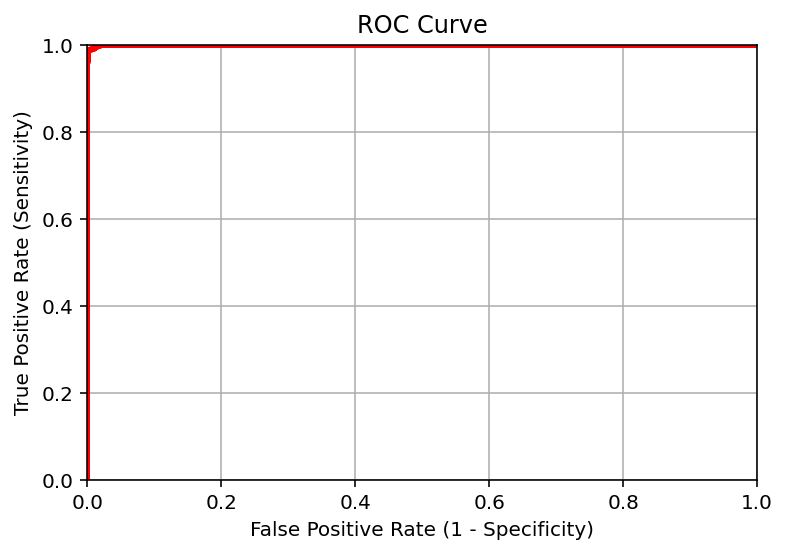

In [41]:
predict_proba_test = model_lg.predict_proba(x_test)
show_roc_curve(target=y_test, predict_proba=predict_proba_test)

In [42]:
# Calculate AUC (Area Under Curve) for ROC Curve for test data
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_proba_test[:,1])
auc = float(metrics.auc(fpr, tpr))
print(f"AUC = {auc:.4f}")

AUC = 0.9998


In [43]:
model_lg.coef_[0]

array([ 2.91461973e-01,  1.80453495e+01,  1.15531576e+00, -9.49874246e-02,
        2.79428625e-01,  2.68056398e-01, -8.91805701e-02, -9.10767494e-04,
        1.36962898e-01,  0.00000000e+00, -2.10987478e-01])

In [44]:
myfeatures

['runtime_in_minutes',
 'tomatometer_rating',
 'audience_rating',
 'rating_NC17',
 'rating_NR',
 'rating_PG',
 'rating_PG-13',
 'rating_PG-13)',
 'rating_R',
 'rating_R)',
 'audience_status_Upright']

In [45]:
res = pd.DataFrame({"coef":model_lg.coef_[0], "feat":myfeatures})
res

,coef,feat
0,0.291462,runtime_in_minutes
1,18.045349,tomatometer_rating
2,1.155316,audience_rating
3,-0.094987,rating_NC17
4,0.279429,rating_NR
5,0.268056,rating_PG
6,-0.089181,rating_PG-13
7,-0.000911,rating_PG-13)
8,0.136963,rating_R
9,0.000000,rating_R)


In [46]:
def top_predictors(res):
    res2 = res.copy()
    res2['coef'] = res2['coef'].abs()
    res3=res2.sort_values(by='coef', ascending=False)
    res3.index = range(len(res3))
    display(res3)

In [47]:
top_predictors(res)

,coef,feat
0,18.045349,tomatometer_rating
1,1.155316,audience_rating
2,0.291462,runtime_in_minutes
3,0.279429,rating_NR
4,0.268056,rating_PG
5,0.210987,audience_status_Upright
6,0.136963,rating_R
7,0.094987,rating_NC17
8,0.089181,rating_PG-13
9,0.000911,rating_PG-13)


## RandomForest

In [48]:
# RandomForest - 256 ms for 10K points
model_rf = RandomForestClassifier(n_estimators=100) 
print("model_name =",model_rf.__class__.__name__)

model_name = RandomForestClassifier


In [49]:
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [50]:
print_model_results(model_rf)

----------------------------------------
Performance on training dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2770
           1       1.00      1.00      1.00      3608

    accuracy                           1.00      6378
   macro avg       1.00      1.00      1.00      6378
weighted avg       1.00      1.00      1.00      6378

[[2770    0]
 [   0 3608]]
----------------------------------------
Performance on test dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       927
           1       1.00      1.00      1.00      1199

    accuracy                           1.00      2126
   macro avg       1.00      1.00      1.00      2126
weighted avg       1.00      1.00      1.00      2126

[[ 927    0]
 [   0 1199]]
----------------------------------------


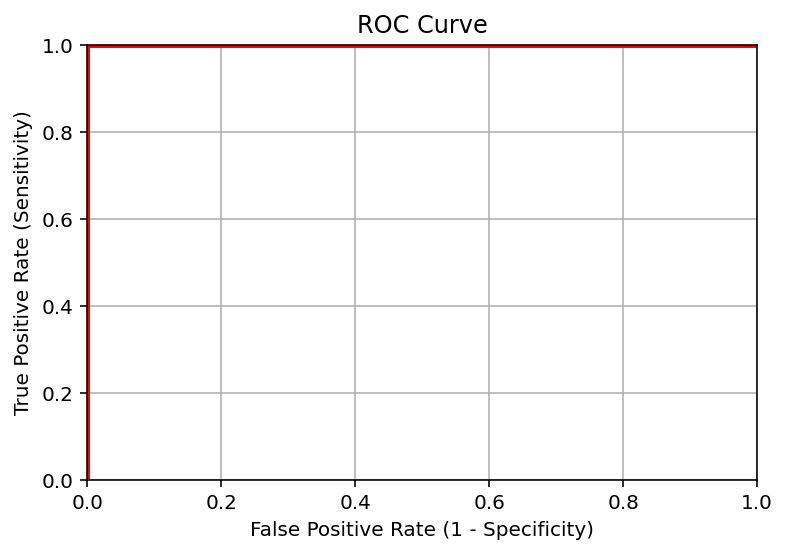

In [51]:
# show ROC for the test data
predict_proba_test = model_rf.predict_proba(x_test)
show_roc_curve(target=y_test, predict_proba=predict_proba_test)

In [52]:
# Calculate AUC (Area Under Curve) for ROC Curve for test data
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_proba_test[:,1])
auc = float(metrics.auc(fpr, tpr))
print(f"AUC = {auc:.4f}")

AUC = 1.0000


In [53]:
model_rf.feature_importances_

array([7.23211876e-03, 7.99496748e-01, 1.14974999e-01, 4.76960195e-05,
       1.50628850e-02, 3.58054366e-04, 5.68526358e-03, 5.04394557e-06,
       1.00159245e-03, 0.00000000e+00, 5.61355984e-02])

In [54]:
res_rf = pd.DataFrame({"coef":model_rf.feature_importances_, "feat":myfeatures})
res_rf

,coef,feat
0,0.007232,runtime_in_minutes
1,0.799497,tomatometer_rating
2,0.114975,audience_rating
3,0.000048,rating_NC17
4,0.015063,rating_NR
5,0.000358,rating_PG
6,0.005685,rating_PG-13
7,0.000005,rating_PG-13)
8,0.001002,rating_R
9,0.000000,rating_R)


In [55]:
top_predictors(res_rf)

,coef,feat
0,0.799497,tomatometer_rating
1,0.114975,audience_rating
2,0.056136,audience_status_Upright
3,0.015063,rating_NR
4,0.007232,runtime_in_minutes
5,0.005685,rating_PG-13
6,0.001002,rating_R
7,0.000358,rating_PG
8,0.000048,rating_NC17
9,0.000005,rating_PG-13)


In [56]:
top_predictors(res)

,coef,feat
0,18.045349,tomatometer_rating
1,1.155316,audience_rating
2,0.291462,runtime_in_minutes
3,0.279429,rating_NR
4,0.268056,rating_PG
5,0.210987,audience_status_Upright
6,0.136963,rating_R
7,0.094987,rating_NC17
8,0.089181,rating_PG-13
9,0.000911,rating_PG-13)


## We see that two top predictors are:
- tomatometer_rating
- audience_rating

<br>Let's see what will happen if we use only these two columns.
<br>Let's re-do the calculations using just two data columns:

In [57]:
target = df3['tomatometer_status'].values
data = df3.copy()
data = data[['tomatometer_rating','audience_rating']] # using only two data columns
myfeatures = list(data.columns)
data_values = data.values
print(data_values)
print(target)

[[1.5372857  1.30083706]
 [0.18182949 0.31285955]
 [0.72731796 0.8233146 ]
 ...
 [0.99179722 0.57632022]
 [0.71078801 0.95504493]
 [0.33059907 0.55985393]]
[1 0 0 ... 1 0 0]


In [58]:
x_train, x_test, y_train, y_test = train_test_split(data_values, target, test_size=0.25, random_state=0)

model_rf2 = RandomForestClassifier(n_estimators=100) 
model_rf2.fit(x_train, y_train)

RandomForestClassifier()

In [59]:
print_model_results(model_rf2)

----------------------------------------
Performance on training dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2770
           1       1.00      1.00      1.00      3608

    accuracy                           1.00      6378
   macro avg       1.00      1.00      1.00      6378
weighted avg       1.00      1.00      1.00      6378

[[2770    0]
 [   0 3608]]
----------------------------------------
Performance on test dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       927
           1       1.00      1.00      1.00      1199

    accuracy                           1.00      2126
   macro avg       1.00      1.00      1.00      2126
weighted avg       1.00      1.00      1.00      2126

[[ 927    0]
 [   0 1199]]
----------------------------------------


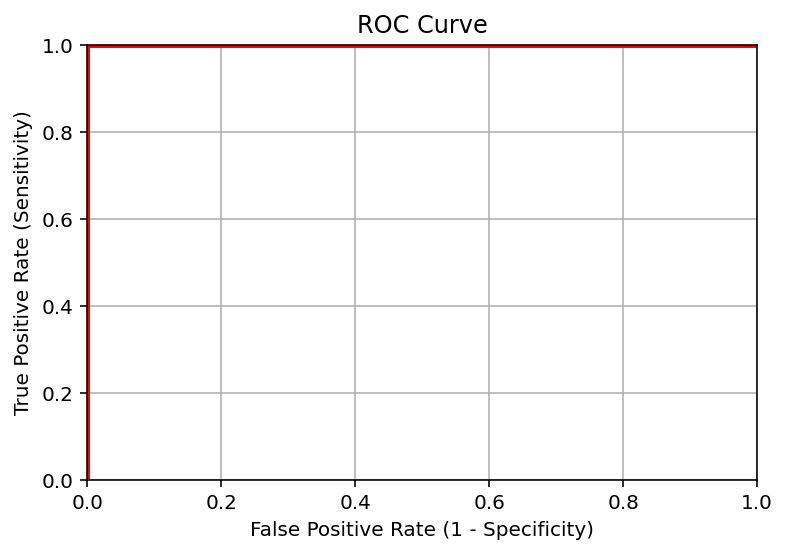

In [60]:
# show ROC for the test data
predict_proba_test = model_rf2.predict_proba(x_test)
show_roc_curve(target=y_test, predict_proba=predict_proba_test)

In [61]:
# Calculate AUC (Area Under Curve) for ROC Curve for test data
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_proba_test[:,1])
auc = float(metrics.auc(fpr, tpr))
print(f"AUC = {auc:.4f}")

AUC = 1.0000


#### Conclusion - we can use just two columns for prediction: 
- tomatometer_rating
- audience_rating

## XGBoost

In [62]:
# first re-create data for training/testing
data = df3.copy()
del data['tomatometer_status']
for col in ['audience_count', 'audience_top_critics_count',
            'audience_fresh_critics_count','audience_rotten_critics_count']:
    if col in data.columns:
        del data[col]
myfeatures = list(data.columns)
data_values = data.values
print(data_values)

target = df3['tomatometer_status'].values
print(target)

x_train, x_test, y_train, y_test = train_test_split(data_values, target, test_size=0.25, random_state=0)

[[0.69068742 1.5372857  1.30083706 ... 0.         0.         1.        ]
 [0.88802668 0.18182949 0.31285955 ... 0.         0.         0.        ]
 [1.22350342 0.72731796 0.8233146  ... 0.         0.         0.        ]
 ...
 [0.85842579 0.99179722 0.57632022 ... 1.         0.         0.        ]
 [1.13470075 0.71078801 0.95504493 ... 0.         0.         0.        ]
 [0.94722846 0.33059907 0.55985393 ... 1.         0.         0.        ]]
[1 0 0 ... 1 0 0]


In [63]:

os.environ['KMP_DUPLICATE_LIB_OK']='True'
params = { 'eta'        : 0.03,
           'objective'  : 'binary:logistic',
           'eval_metric': 'auc',
           'max_depth'  : 15 }
params['eta'] = 0.03
model_xg = XGBClassifier(**params) 
print("model_name =",model_xg.__class__.__name__)

model_name = XGBClassifier


In [64]:
model_xg.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=0.03,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.0299999993, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, ...)

In [65]:
print_model_results(model_xg)

----------------------------------------
Performance on training dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2770
           1       1.00      1.00      1.00      3608

    accuracy                           1.00      6378
   macro avg       1.00      1.00      1.00      6378
weighted avg       1.00      1.00      1.00      6378

[[2770    0]
 [   0 3608]]
----------------------------------------
Performance on test dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       927
           1       1.00      1.00      1.00      1199

    accuracy                           1.00      2126
   macro avg       1.00      1.00      1.00      2126
weighted avg       1.00      1.00      1.00      2126

[[ 927    0]
 [   0 1199]]
----------------------------------------


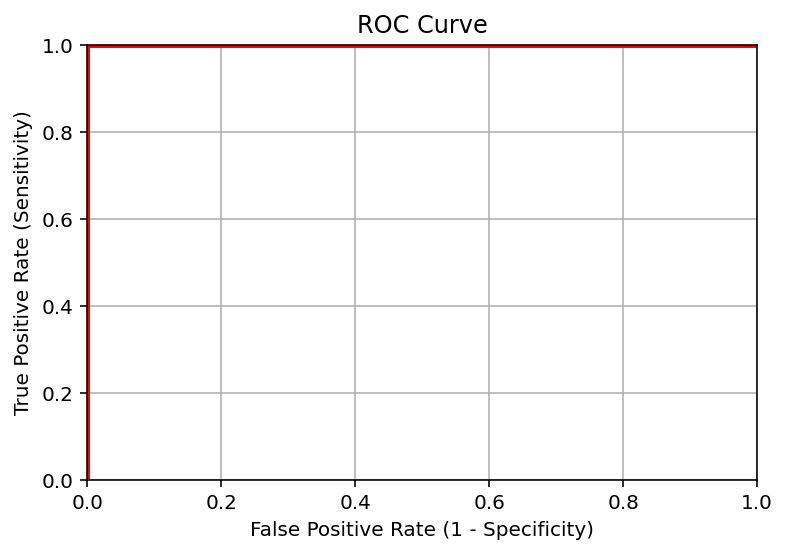

In [66]:
# show ROC for the test data
predict_proba_test = model_xg.predict_proba(x_test)
show_roc_curve(target=y_test, predict_proba=predict_proba_test)

In [67]:
# Calculate AUC (Area Under Curve) for ROC Curve for test data
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_proba_test[:,1])
auc = float(metrics.auc(fpr, tpr))
print(f"AUC = {auc:.4f}")

AUC = 1.0000


In [68]:
model_xg.feature_importances_

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [69]:
myfeatures

['runtime_in_minutes',
 'tomatometer_rating',
 'audience_rating',
 'rating_NC17',
 'rating_NR',
 'rating_PG',
 'rating_PG-13',
 'rating_PG-13)',
 'rating_R',
 'rating_R)',
 'audience_status_Upright']

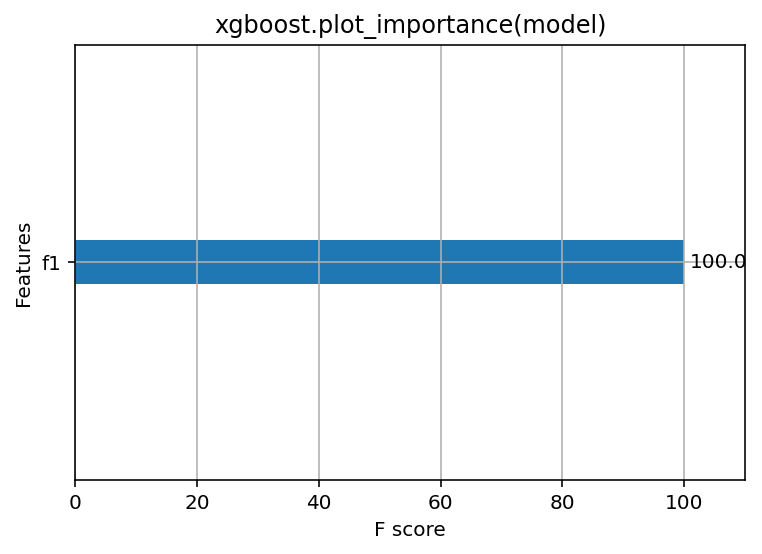

In [70]:
xgboost.plot_importance(model_xg)
plt.title("xgboost.plot_importance(model)")
plt.show()

In [71]:
# XGBoost has integrated Tree SHAP implementation
# (SHAP = SHapley Additive exPlanation - by Lundberg and Lee, 2016)
# Here is Jupyter notebook demonstrating the usage:
# https://slundberg.github.io/shap/notebooks/Census%20income%20classification%20with%20XGBoost.html

# Shapley Values - a method from coalitional game theory to explain prediction 
# by assuming that each feature value of the instance is a "player" in a game 
# where the prediction is the payout. 
# https://christophm.github.io/interpretable-ml-book/shapley.html#shapley

explainer = shap.TreeExplainer(model_xg)

In [72]:
shap_values = explainer.shap_values(data)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [73]:

# Visualize a single prediction
# Note that we use the "display values" dataframe 
# so we get nice strings instead of category codes.

shap.force_plot(explainer.expected_value, shap_values[0,:], data.iloc[0,:])